# Capstone Project - The Battle of Neighborhoods
# Where Should I Live?

As a part of the final course of IBM Data Science Professional Certificate - we have worked on a final Capstone Project. Main objectives of the project were as follows:
- Define a problem for your capstone project
- Discuss the data that you will use to solve the problem
- Carry out the work to complete the capstone project using available means such as Python libraries and Foursquare location data 

<br> In this project, we will go through all the steps from problem identification, data gathering to final analysis and finish up with a conclusion. 

## 1. Introduction

For this project I have decided to select not necessarily a true business problem, but, more of a life one. 

Imagine the most simple task each of us have to face when you are looking to move to another city - where should I live? Which area should i pick? What neighbourhood? 
I was faced with this task about 3 years ago when I was moving to Toronto for work. Unfortunately, at that point of time I didn't have enough of data science knowledge to automate the search process, thus, decision was made based on lots and lots of manual research. However, having all this valuable Python knowledge, let's try to see how I could have tackled this problem. 

### Problem Statement

To reiterate - the goal is to __indentify the most suitable neighbourhood in Toronto to move into__ based on the following criteria: 
- proximity to Toronto Downtown
- availability of various venues around. Venue list should include: 
    - Movie Theater
    - Dance Studio
    - Food
        - Gluten-free Restaurant
        - Vegetarian / Vegan Restaurant
        - Coffee Shop
    - Grocery Store
    - Pharmacy
    - Shopping Mall
    - Nightlife Spot
    - Gym / Fitness Center
    - Park

### Target Audience

Who may be interested in this project? 
1. Most certainly, people who are looking to relocate into a new city due to any reason.
2. Most likely, people who are looking to settle down and purchase a property, however, they are confused which area is the best. With some little tweaks to the process - this can become quite valuable and, most importably, time saving way to arrive to final decision. 
3. And, of course, my fellow Data Analysts and Data Scientists, who are looking to analyze the neighborhoods of any city, in my case - Toronto, using a variety of techniques to reach desired results and draw subsequent conclusions. 

## 2. Data

The data used for this project is as follows:
1. Wikipedia page https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, containing the list of Toronto postal codes, Boroughs and Neighbourhoods. We will scrape this page, get the data we need and create a pandas dataframe. A bit of assumptions:
<br> 1.1. The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood.
<br> 1.2. We will only process the cells that have an assigned borough. We shall ignore cells with a borough that is Not assigned. 
2. A CSV file that has the geographical coordinates of each of Toronto's postal codes: http://cocl.us/Geospatial_data. We will use this link to obtain needed data and create new dataframe containing following columns:
    - Postal Code
    - Borough
    - Neighbourhood
    - Lattitude
    - Longitude  
3. We also will be using Foursquare API to obtain needed information on the venues in the neighborhoods of Toronto. The API returns a JSON file and we will be transforming it into a dataframe for our analysis.

---

## 3. Analysis

### Compiling Toronto data of Neighborhoods and coordinates

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing libraries for scraping

from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [3]:
# creating URL and getting the contect form Wiki page

url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
r = requests.get(url)
print(r.content[:100])

b'\n<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<titl'


In [4]:
# putting the content of the page into Beautiful Soup object

soup = BeautifulSoup(r.content, 'lxml')

In [5]:
# looking into the HTML code of the page

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XrRJvgpAEKcAAI@-EI0AAAAQ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":955414546,"wgRevisionId":955414546,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

In [6]:
# finding the table in Beautiful Soup object and readin it into Data Frame

table = soup.find_all('table')
df = pd.read_html(str(table))[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [7]:
# cleaning tha data - dropping rows with Not Assigned boroughs, resetting the index numbers, stripping rows in Neighborhood column form any possible spaces, and replacing '/' with ','

indexBorough = df[ df['Borough'] == "Not assigned"].index
df.drop(indexBorough, inplace=True)
df = df.reset_index(drop=True)
df['Neighborhood'] = df['Neighborhood'].str.strip()
df['Neighborhood']=df['Neighborhood'].apply(lambda x: x.replace('/', ','))
df.head(10)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [8]:
df.columns = ['Postal code', 'Borough', 'Neighborhood']
df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [9]:
# importing the file with coordinate data and reading it into new data frame

url2 = "http://cocl.us/Geospatial_data"
df1 = pd.read_csv(url2)

df1.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
df1.columns = ['Postal code','Latitude','Longitude']
df1.head()

,Postal code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
# merging both data frames based on Postal code column

df_final=pd.merge(df, df1, on='Postal code', how='left')
print(df_final.shape)
df_final.head()

(103, 5)


,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [12]:
print ('Final dataframe has', len(df_final['Borough'].unique()), 'unique boroughs and', df_final.shape[0], 'neighbourhoods.') 

Final dataframe has 10 unique boroughs and 103 neighbourhoods.


In [13]:
# loading folium library to be able to generate maps

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Library imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [14]:
#setting Toronto coordinates

latitude = 43.6532 
longitude = -79.3832

In [15]:
# generating Toronto map with all neighborhoods mapped on it

map_to = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

### Foursquare Venues Data

In [16]:
# Defining Foursquare Credentials and Version

CLIENT_ID = 'FI5XSIWZBBNRK51AT5UZPKPROCHURVVFLJCS4IVIX5X1E1Q1' 
CLIENT_SECRET = 'ASNOJWDDVEDQJICSCVX0VGVEVNSHJPFPFHBWAC31LHYNDK5M' 
VERSION = '20200423' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FI5XSIWZBBNRK51AT5UZPKPROCHURVVFLJCS4IVIX5X1E1Q1
CLIENT_SECRET:ASNOJWDDVEDQJICSCVX0VGVEVNSHJPFPFHBWAC31LHYNDK5M


In [17]:
# creating a function to get top 200 nearby venues  

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius


def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
#  running this function on each neighborhood and creating a new dataframe called toronto_venues

toronto_venues = getNearbyVenues(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

In [21]:
# updating columns to be more useful for sorting process

toronto_venues.columns = ['Neighborhood', 'NeighbLat', 'NeighbLong', 'Venue', 'VenLat', 'VenLong', 'VenCat']
toronto_venues.head(10)

,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
3,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store
5,Parkwoods,43.753259,-79.329656,Food Basics,43.760549,-79.326045,Supermarket
6,Parkwoods,43.753259,-79.329656,Shoppers Drug Mart,43.745315,-79.325800,Pharmacy
7,Parkwoods,43.753259,-79.329656,High Street Fish & Chips,43.745260,-79.324949,Fish & Chips Shop
8,Parkwoods,43.753259,-79.329656,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
9,Parkwoods,43.753259,-79.329656,Pizza Pizza,43.760231,-79.325666,Pizza Place


In [22]:
# getting a # of rows and columns - # of rows is indicating the # of venues returned in JSON file 

toronto_venues.shape

(4909, 7)

In [23]:
# sorting based on Neighborhoods - how many venues are in each neighborhood

toronto_venues.groupby('Neighborhood').count()

,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat
Neighborhood,,,,,,
Agincourt,44,44,44,44,44,44
"Alderwood, Long Branch",27,27,27,27,27,27
"Bathurst Manor, Wilson Heights, Downsview North",28,28,28,28,28,28
Bayview Village,14,14,14,14,14,14
"Bedford Park, Lawrence Manor East",41,41,41,41,41,41
Berczy Park,100,100,100,100,100,100
"Birch Cliff, Cliffside West",13,13,13,13,13,13
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
Business reply mail Processing Centre,47,47,47,47,47,47


In [24]:
print('There are {} uniques categories.'.format(len(toronto_venues['VenCat'].unique())))

There are 330 uniques categories.


### Analysis of venues and neighborhoods

In [25]:
# what are the neighbourhoods with the max # of venues 

neighborhood_max_venues=toronto_venues.groupby('Neighborhood').count().sort_values('Venue',ascending=False)
neighborhood_max_venues.head()

,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat
Neighborhood,,,,,,
Willowdale,112,112,112,112,112,112
"Little Portugal, Trinity",100,100,100,100,100,100
Church and Wellesley,100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Regent Park, Harbourfront",100,100,100,100,100,100


In [67]:
# what are the neighbourhoods with the min # of venues 

neighborhood_max_venues.tail()

,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat
Neighborhood,,,,,,
Woburn,8,8,8,8,8,8
"Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East",8,8,8,8,8,8
"Rouge Hill, Port Union, Highland Creek",5,5,5,5,5,5
"York Mills, Silver Hills",4,4,4,4,4,4
Northwest,3,3,3,3,3,3


In [26]:
# of unique ven_cat in each of neighbouhoods

unique_categories=toronto_venues.groupby('Neighborhood')['VenCat'].nunique()
df_unique_categories=unique_categories.to_frame().sort_values('VenCat',ascending=False)
df_unique_categories.head()

,VenCat
Neighborhood,
Church and Wellesley,67
"Queen's Park, Ontario Provincial Government",65
"The Annex, North Midtown, Yorkville",63
"Harbourfront East, Union Station, Toronto Islands",62
"Richmond, Adelaide, King",61


In [27]:
# creating new DF which will combine data from toronto_venues + Borough Column from original DF

df_temp=df.drop(['Postal code'], axis=1)
toronto_info=pd.merge(toronto_venues, df_temp, on='Neighborhood')
toronto_info.head(10)

,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat,Borough
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant,North York
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,North York
2,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café,North York
3,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant,North York
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store,North York
5,Parkwoods,43.753259,-79.329656,Food Basics,43.760549,-79.326045,Supermarket,North York
6,Parkwoods,43.753259,-79.329656,Shoppers Drug Mart,43.745315,-79.325800,Pharmacy,North York
7,Parkwoods,43.753259,-79.329656,High Street Fish & Chips,43.745260,-79.324949,Fish & Chips Shop,North York
8,Parkwoods,43.753259,-79.329656,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy,North York
9,Parkwoods,43.753259,-79.329656,Pizza Pizza,43.760231,-79.325666,Pizza Place,North York


In [28]:
# Boroughs with highest # of venues total

borough_max_venues=toronto_info.groupby('Borough').count().sort_values('Venue',ascending=False)
borough_max_venues.head()

,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat
Borough,,,,,,,
Downtown Toronto,1674,1674,1674,1674,1674,1674,1674
North York,1017,1017,1017,1017,1017,1017,1017
Central Toronto,567,567,567,567,567,567,567
West Toronto,540,540,540,540,540,540,540
East Toronto,407,407,407,407,407,407,407


In [29]:
# most popular venues in all of boroughs - combined

most_popular_venues=toronto_info.groupby('VenCat').count().sort_values('Borough',ascending=False)
most_popular_venues.head(10)

,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,Borough
VenCat,,,,,,,
Coffee Shop,414,414,414,414,414,414,414
Café,233,233,233,233,233,233,233
Park,166,166,166,166,166,166,166
Pizza Place,165,165,165,165,165,165,165
Restaurant,150,150,150,150,150,150,150
Italian Restaurant,114,114,114,114,114,114,114
Grocery Store,111,111,111,111,111,111,111
Bakery,107,107,107,107,107,107,107
Japanese Restaurant,99,99,99,99,99,99,99


In [30]:
# what are the top 5 Boroughs with the highest number of unique venue categories

unique_categories_borough = toronto_info.groupby('Borough')['VenCat'].nunique()
df_unique_categories_borough=unique_categories_borough.to_frame().sort_values('VenCat',ascending=False)
df_unique_categories_borough.head()

,VenCat
Borough,
Downtown Toronto,196
West Toronto,157
North York,151
East Toronto,132
Central Toronto,126


In [31]:
# create new df with most desirable boroughs that have the highest number of unique venue categories

search_values = ['Downtown Toronto', 'West Toronto', 'North York', 'East York', 'Central Toronto']
df_most_desired_boroughs=toronto_info[toronto_info.Borough.str.contains('|'.join(search_values))]
print(df_most_desired_boroughs.shape)
df_most_desired_boroughs.head()

(4053, 8)


,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat,Borough
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant,North York
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,North York
2,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café,North York
3,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant,North York
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store,North York


### One-hot encoding for most desired boroughs

In [32]:
toronto_onehot = pd.get_dummies(df_most_desired_boroughs[['VenCat']], prefix="", prefix_sep="")

# add neighborhood column to dataframe
toronto_onehot['Neighborhood'] = df_most_desired_boroughs['Neighborhood'] 
toronto_onehot.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# checking the list of all columns - note that added column "Neighborhood" was actually added in the middle of the data frame, based on alphabetic order 

cols = toronto_onehot.columns.tolist()
cols

['Accessories Store',
 'Afghan Restaurant',
 'Airport',
 'Airport Lounge',
 'American Restaurant',
 'Amphitheater',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bike Shop',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Camera Store',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Castle',
 'Cemetery',
 'Cheese Shop',
 'Chinese Restaurant'

In [34]:
# moving the column "Neighborhood" to the front of data frame

cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

['Neighborhood',
 'Accessories Store',
 'Afghan Restaurant',
 'Airport',
 'Airport Lounge',
 'American Restaurant',
 'Amphitheater',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bike Shop',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Camera Store',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Castle',
 'Cemetery',
 'Cheese Shop',
 'Ch

In [35]:
# checking the results - column moved to the front

toronto_onehot = toronto_onehot.reindex(columns= cols)
print(toronto_onehot.shape)
toronto_onehot.head()

(4053, 300)


,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.00,0.000000,0.00,...,0.035714,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00
1,Bayview Village,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00
2,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.000000,0.0000,0.024390,0.00,0.00,0.000000,0.00,...,0.024390,0.000000,0.000000,0.00,0.000000,0.024390,0.02439,0.000000,0.000000,0.00
3,Berczy Park,0.000000,0.000000,0.000000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00
4,"Brockton, Parkdale Village, Exhibition Place",0.010000,0.000000,0.000000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00
5,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.062500,0.0625,0.000000,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00
6,Central Bay Street,0.000000,0.000000,0.000000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.01000,0.000000,0.020000,0.00
7,Christie,0.000000,0.000000,0.000000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,0.00000,0.000000,0.000000,0.00
8,Church and Wellesley,0.000000,0.000000,0.000000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.01000,0.010000,0.020000,0.00
9,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.0000,0.020000,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00


In [37]:
# printing each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0          Coffee Shop  0.07
1                 Bank  0.07
2  Fried Chicken Joint  0.04
3   Frozen Yogurt Shop  0.04
4           Ski Chalet  0.04


----Bayview Village----
                 venue  freq
0        Grocery Store  0.14
1  Japanese Restaurant  0.14
2                 Bank  0.14
3          Gas Station  0.14
4           Restaurant  0.07


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.07
1         Coffee Shop  0.07
2                Bank  0.05
3      Sandwich Place  0.05
4          Restaurant  0.02


----Berczy Park----
                 venue  freq
0          Coffee Shop  0.12
1                 Café  0.07
2                Hotel  0.05
3  Japanese Restaurant  0.04
4           Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
                    venue  freq
0                    Café  0.08
1             Coffee Shop  0.06
2          

In [38]:
# creating a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
# creating the new dataframe and displaying the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Convenience Store,Supermarket,Frozen Yogurt Shop,Fried Chicken Joint,Dog Run,Sandwich Place,Sushi Restaurant,Shopping Mall
1,Bayview Village,Bank,Grocery Store,Gas Station,Japanese Restaurant,Chinese Restaurant,Restaurant,Park,Intersection,Café,Trail
2,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Bank,Sandwich Place,Bridal Shop,Fast Food Restaurant,Intersection,Sushi Restaurant,Juice Bar,Sports Club
3,Berczy Park,Coffee Shop,Café,Hotel,Japanese Restaurant,Restaurant,Beer Bar,Park,Seafood Restaurant,Cocktail Bar,Creperie
4,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Restaurant,Bar,Furniture / Home Store,Bakery,Tibetan Restaurant,Gift Shop,Supermarket,Indian Restaurant


In [40]:
neighborhoods_venues_sorted.shape

(58, 11)

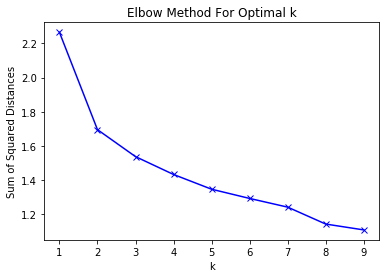

In [41]:
# importing KMeans library

import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 


Sum_of_squared_distances = []
K = range(1, 10)
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

for kvalues in K:
    #km = KMeans(n_clusters=kvalues, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(toronto_grouped_clustering)
    km = KMeans(n_clusters=kvalues, init='k-means++', n_init=10, max_iter=300).fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
# performing KMeans analysis based on 4 clusters
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [43]:
# add clustering labels 
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge neighborhoods_venues_sorted to add latitude/longitude for each neighborhood from 
toronto_merged = df_most_desired_boroughs.drop(['Venue', 'VenLat', 'VenLong', 'VenCat'], axis=1) 
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.drop_duplicates(subset=None, keep="first", inplace=True)

print(toronto_merged.shape)
toronto_merged.head() # check the last columns

(63, 15)


,Neighborhood,NeighbLat,NeighbLong,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,43.753259,-79.329656,North York,3,Park,Convenience Store,Shopping Mall,Pharmacy,Bus Stop,Laundry Service,Café,Caribbean Restaurant,Tennis Court,Discount Store
29,Victoria Village,43.725882,-79.315572,North York,0,Coffee Shop,Hockey Arena,Boxing Gym,Lounge,Café,Park,Golf Course,Men's Store,Grocery Store,Gym / Fitness Center
44,"Regent Park, Harbourfront",43.654260,-79.360636,Downtown Toronto,0,Coffee Shop,Theater,Restaurant,Park,Café,Diner,Bakery,Italian Restaurant,Pub,Breakfast Spot
144,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,North York,0,Clothing Store,Fast Food Restaurant,Coffee Shop,Restaurant,Accessories Store,Dessert Shop,Sushi Restaurant,Furniture / Home Store,Fried Chicken Joint,Vietnamese Restaurant
193,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Park,Japanese Restaurant,Ramen Restaurant,Gastropub,Café,Thai Restaurant,Bookstore,Italian Restaurant


In [44]:
# importing Matplotlib and associated plotting modules

import matplotlib.cm as cm
import matplotlib.colors as colors

In [45]:
# creating a map of Downtown Toronto clustered neighborhoods

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['NeighbLat'], toronto_merged['NeighbLong'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
# finding out how many neighborhoods are in each cluster

for cluster_num in range(kclusters):
    num_of_nbh = toronto_merged[toronto_merged['Cluster Labels'] == cluster_num].shape[0]
    print('The number of neighbourhoods in cluster {} is {}'.format(cluster_num+1, num_of_nbh))

The number of neighbourhoods in cluster 1 is 50
The number of neighbourhoods in cluster 2 is 1
The number of neighbourhoods in cluster 3 is 1
The number of neighbourhoods in cluster 4 is 11


In [47]:
# df showing the list of neighborhoods with most common venues per cluster

cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
print('There are {} neighborhoods in cluster 1'.format(cluster1.shape[0]))
cluster1

There are 50 neighborhoods in cluster 1


,Neighborhood,NeighbLat,NeighbLong,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Victoria Village,43.725882,-79.315572,North York,0,Coffee Shop,Hockey Arena,Boxing Gym,Lounge,Café,Park,Golf Course,Men's Store,Grocery Store,Gym / Fitness Center
44,"Regent Park, Harbourfront",43.654260,-79.360636,Downtown Toronto,0,Coffee Shop,Theater,Restaurant,Park,Café,Diner,Bakery,Italian Restaurant,Pub,Breakfast Spot
144,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,North York,0,Clothing Store,Fast Food Restaurant,Coffee Shop,Restaurant,Accessories Store,Dessert Shop,Sushi Restaurant,Furniture / Home Store,Fried Chicken Joint,Vietnamese Restaurant
193,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Park,Japanese Restaurant,Ramen Restaurant,Gastropub,Café,Thai Restaurant,Bookstore,Italian Restaurant
324,Don Mills,43.745906,-79.352188,North York,0,Coffee Shop,Restaurant,Japanese Restaurant,Burger Joint,Bank,Supermarket,Asian Restaurant,Gym,Beer Store,Pizza Place
388,Don Mills,43.725900,-79.340923,North York,0,Coffee Shop,Restaurant,Japanese Restaurant,Burger Joint,Bank,Supermarket,Asian Restaurant,Gym,Beer Store,Pizza Place
470,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,East York,0,Fast Food Restaurant,Pizza Place,Brewery,Gym / Fitness Center,Athletics & Sports,Pet Store,Bakery,Coffee Shop,Café,Rock Climbing Spot
491,"Garden District, Ryerson",43.657162,-79.378937,Downtown Toronto,0,Coffee Shop,Gastropub,Japanese Restaurant,Café,Hotel,Italian Restaurant,Restaurant,Diner,Theater,Park
591,Glencairn,43.709577,-79.445073,North York,0,Grocery Store,Fast Food Restaurant,Gym,Coffee Shop,Gas Station,Italian Restaurant,Restaurant,Electronics Store,Mediterranean Restaurant,Shoe Store
675,St. James Town,43.651494,-79.375418,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Gastropub,Seafood Restaurant,Theater,Italian Restaurant,Hotel,Cocktail Bar,Tea Room


In [69]:
# df showing the list of neighborhoods with most common venues per cluster

cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
print('There are {} neighborhoods in cluster 2'.format(cluster2.shape[0]))
cluster2

There are 1 neighborhoods in cluster 2


,Neighborhood,NeighbLat,NeighbLong,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2628,"York Mills, Silver Hills",43.75749,-79.374714,North York,1,Park,Pool,Zoo,Ethiopian Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School


In [70]:
# df showing the list of neighborhoods with most common venues per cluster

cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
print('There are {} neighborhoods in cluster 3'.format(cluster3.shape[0]))
cluster3

There are 1 neighborhoods in cluster 3


,Neighborhood,NeighbLat,NeighbLong,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2823,Humber Summit,43.756303,-79.565963,North York,2,Pizza Place,Bank,Arts & Crafts Store,Bakery,Park,Shopping Mall,Electronics Store,Pharmacy,Italian Restaurant,Falafel Restaurant


In [71]:
# df showing the list of neighborhoods with most common venues per cluster

cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]
print('There are {} neighborhoods in cluster 4'.format(cluster4.shape[0]))
cluster4

There are 11 neighborhoods in cluster 4


,Neighborhood,NeighbLat,NeighbLong,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,43.753259,-79.329656,North York,3,Park,Convenience Store,Shopping Mall,Pharmacy,Bus Stop,Laundry Service,Café,Caribbean Restaurant,Tennis Court,Discount Store
647,Woodbine Heights,43.695344,-79.318389,East York,3,Coffee Shop,Park,Pizza Place,Skating Rink,Sandwich Place,Pub,Athletics & Sports,Farmers Market,Plaza,Café
1350,Hillcrest Village,43.803762,-79.363452,North York,3,Park,Coffee Shop,Pharmacy,Restaurant,Shopping Mall,Chinese Restaurant,Sandwich Place,Korean Restaurant,Bank,Bakery
1369,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,North York,3,Coffee Shop,Bank,Convenience Store,Supermarket,Frozen Yogurt Shop,Fried Chicken Joint,Dog Run,Sandwich Place,Sushi Restaurant,Shopping Mall
2017,Bayview Village,43.786947,-79.385975,North York,3,Bank,Grocery Store,Gas Station,Japanese Restaurant,Chinese Restaurant,Restaurant,Park,Intersection,Café,Trail
2812,"North Park, Maple Leaf Park, Upwood Park",43.713756,-79.490074,North York,3,Coffee Shop,Chinese Restaurant,Pizza Place,Park,Gas Station,Bakery,Athletics & Sports,Mediterranean Restaurant,Dim Sum Restaurant,Convenience Store
3032,"Humberlea, Emery",43.724766,-79.532242,North York,3,Golf Course,Convenience Store,Storage Facility,Bakery,Park,Intersection,Gas Station,Discount Store,Zoo,Ethiopian Restaurant
3277,Lawrence Park,43.728020,-79.388790,Central Toronto,3,Park,Bookstore,Café,Trail,Gym / Fitness Center,Coffee Shop,College Quad,College Gym,Bus Line,Farm
3415,York Mills West,43.752758,-79.400049,North York,3,Coffee Shop,Park,Restaurant,Convenience Store,Business Service,Bowling Alley,French Restaurant,Gas Station,Bank,Grocery Store
3533,Forest Hill North & West,43.696948,-79.411307,Central Toronto,3,Park,Bank,Coffee Shop,Café,Gym / Fitness Center,Sushi Restaurant,Skating Rink,Burger Joint,Pharmacy,Japanese Restaurant


### Analysis of data based on certain venue criteria

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
# setting search criteria as a list of venue categories important for a customer
# generating a DF with the list of these venue categories

search_values = ['Movie Theater', 'Dance Studio', 'Gluten-free Restaurant', 'Vegetarian / Vegan Restaurant', 'Coffee Shop', 'Grocery Store', 'Pharmacy', 'Shopping Mall', 'Nightlife Spot', 'Gym / Fitness Center', 'Park']
specific_boroughs=df_most_desired_boroughs[df_most_desired_boroughs.VenCat.str.contains('|'.join(search_values))]
specific_boroughs.head(10)

,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat,Borough
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,North York
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store,North York
6,Parkwoods,43.753259,-79.329656,Shoppers Drug Mart,43.745315,-79.325800,Pharmacy,North York
8,Parkwoods,43.753259,-79.329656,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy,North York
14,Parkwoods,43.753259,-79.329656,Sandover Park,43.760277,-79.333305,Park,North York
19,Parkwoods,43.753259,-79.329656,La Notre,43.760704,-79.325396,Coffee Shop,North York
21,Parkwoods,43.753259,-79.329656,Parkwoods Village Centre,43.760735,-79.324873,Shopping Mall,North York
25,Parkwoods,43.753259,-79.329656,Broadlands Park,43.746746,-79.322502,Park,North York
28,Parkwoods,43.753259,-79.329656,Donwood Plaza,43.745369,-79.325435,Shopping Mall,North York
30,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,North York


In [72]:
specific_boroughs.shape

(712, 8)

In [53]:
# how many venues of each category are there per borough

specific_boroughs_grouped=specific_boroughs.groupby(['Borough', 'VenCat']).count()
specific_boroughs_grouped.head(76)

Neighborhood  NeighbLat  \
Borough          VenCat                                                   
Central Toronto  Coffee Shop                              44         44   
                 Grocery Store                            11         11   
                 Gym / Fitness Center                      7          7   
                 Indie Movie Theater                       1          1   
                 Movie Theater                             4          4   
                 Park                                     20         20   
                 Pharmacy                                 11         11   
                 Vegetarian / Vegan Restaurant             9          9   
Downtown Toronto Coffee Shop                             151        151   
                 Dance Studio                             10         10   
                 Grocery Store                            20         20   
                 Gym / Fitness Center                     13         13   
                 Indie Movie Theater                       1          1   
                 Movie Theater                             4          4   
                 Park                                     44         44   
                 Pharmacy                                  1          1   
                 Shopping Mall                             7          7   
                 Vegetarian / Vegan Restaurant            25         25   
East York        Coffee Shop                              21         21   
                 Grocery Store                             7          7   
                 Gym / Fitness Center                      2          2   
                 Park                                      5          5   
                 Pharmacy                                  5          5   
                 Shopping Mall                             4          4   
North York       Coffee Shop                              82         82   
                 Grocery Store                            36         36   
                 Gym / Fitness Center                     10         10   
                 Movie Theater                             3          3   
                 Park                                     34         34   
                 Pharmacy                                 29         29   
                 Shopping Mall                            17         17   
West Toronto     Coffee Shop                              35         35   
                 Dance Studio                              2          2   
                 Grocery Store                             5          5   
                 Gym / Fitness Center                      2          2   
                 Indie Movie Theater                       1          1   
                 Movie Theater                             1          1   
                 Park                                     15         15   
                 Pharmacy                                  4          4   
                 Theme Park Ride / Attraction              1          1   
                 Vegetarian / Vegan Restaurant             8          8   

                                                NeighbLong  Venue  VenLat  \
Borough          VenCat                                                     
Central Toronto  Coffee Shop                            44     44      44   
                 Grocery Store                          11     11      11   
                 Gym / Fitness Center                    7      7       7   
                 Indie Movie Theater                     1      1       1   
                 Movie Theater                           4      4       4   
                 Park                                   20     20      20   
                 Pharmacy                               11     11      11   
                 Vegetarian / Vegan Restaurant           9      9       9   
Downtown Toronto Coffee Shop                        

In [54]:
# does any of the boroughs has all 11 venue categories

specific_boroughs.groupby('Borough').VenCat.nunique()

Borough
Central Toronto      8
Downtown Toronto    10
East York            6
North York           7
West Toronto        10
Name: VenCat, dtype: int64

In [55]:
# how many venues of each category are there in all 5 most desired boroughs

specific_boroughs.groupby(['VenCat']).count()

,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,Borough
VenCat,,,,,,,
Coffee Shop,333,333,333,333,333,333,333
Dance Studio,12,12,12,12,12,12,12
Grocery Store,79,79,79,79,79,79,79
Gym / Fitness Center,34,34,34,34,34,34,34
Indie Movie Theater,3,3,3,3,3,3,3
Movie Theater,12,12,12,12,12,12,12
Park,118,118,118,118,118,118,118
Pharmacy,50,50,50,50,50,50,50
Shopping Mall,28,28,28,28,28,28,28


In [56]:
# does any of the neighborhoods has all 11 venue categories out of all 5 most desired boroughs 

unique_categories_neighb=specific_boroughs.groupby('Neighborhood').VenCat.nunique()
df_unique_categories_neighb=unique_categories_neighb.to_frame().sort_values('VenCat',ascending=False)
df_unique_categories_neighb.head(10)

,VenCat
Neighborhood,
"Queen's Park, Ontario Provincial Government",7
Willowdale,7
"Garden District, Ryerson",7
"Harbourfront East, Union Station, Toronto Islands",6
Davisville North,6
"Regent Park, Harbourfront",6
"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",6
"Runnymede, Swansea",6
"First Canadian Place, Underground city",6


In [57]:
# sorting DF and selecting only rows belonging to Downtown Toronto, West Toronto and Central Toronto
# these neighborhoods have the highest # of venue categories on the specified criteria list

search_values = ['Downtown Toronto', 'West Toronto', 'Central Toronto']
df10=specific_boroughs[specific_boroughs.Borough.str.contains('|'.join(search_values))]
print(df10.shape)
df10.head()

(457, 8)


,Neighborhood,NeighbLat,NeighbLong,Venue,VenLat,VenLong,VenCat,Borough
45,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,Downtown Toronto
48,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park,Downtown Toronto
54,"Regent Park, Harbourfront",43.65426,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop,Downtown Toronto
55,"Regent Park, Harbourfront",43.65426,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop,Downtown Toronto
56,"Regent Park, Harbourfront",43.65426,-79.360636,Underpass Park,43.655764,-79.354806,Park,Downtown Toronto


In [58]:
# does any of the neighborhoods has all 11 venue categories out of 3 most diverse boroughs 

unique_categories_neighb2=df10.groupby('Neighborhood').VenCat.nunique()
df_unique_categories_neighb2=unique_categories_neighb2.to_frame().sort_values('VenCat',ascending=False)
df_unique_categories_neighb2.head(10)

,VenCat
Neighborhood,
"Queen's Park, Ontario Provincial Government",7
"Garden District, Ryerson",7
Davisville North,6
"Regent Park, Harbourfront",6
"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",6
Church and Wellesley,6
"Harbourfront East, Union Station, Toronto Islands",6
St. James Town,6
"Runnymede, Swansea",6


In [59]:
# adding columns of Borough, Postal code

df_unique_categories_neighb2 = df_unique_categories_neighb2.join(df.set_index('Neighborhood'), on='Neighborhood')
df_unique_categories_neighb2.head(10)

,VenCat,Postal code,Borough
Neighborhood,,,
"Queen's Park, Ontario Provincial Government",7,M7A,Downtown Toronto
"Garden District, Ryerson",7,M5B,Downtown Toronto
Davisville North,6,M4P,Central Toronto
"Regent Park, Harbourfront",6,M5A,Downtown Toronto
"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",6,M4V,Central Toronto
Church and Wellesley,6,M4Y,Downtown Toronto
"Harbourfront East, Union Station, Toronto Islands",6,M5J,Downtown Toronto
St. James Town,6,M5C,Downtown Toronto
"Runnymede, Swansea",6,M6S,West Toronto


In [60]:
# adding the columns of Latitude and Longitude

df_unique_categories_neighb2 = df_unique_categories_neighb2.join(df1.set_index('Postal code'), on='Postal code')
df_unique_categories_neighb2.head(10)

,VenCat,Postal code,Borough,Latitude,Longitude
Neighborhood,,,,,
"Queen's Park, Ontario Provincial Government",7,M7A,Downtown Toronto,43.662301,-79.389494
"Garden District, Ryerson",7,M5B,Downtown Toronto,43.657162,-79.378937
Davisville North,6,M4P,Central Toronto,43.712751,-79.390197
"Regent Park, Harbourfront",6,M5A,Downtown Toronto,43.654260,-79.360636
"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park",6,M4V,Central Toronto,43.686412,-79.400049
Church and Wellesley,6,M4Y,Downtown Toronto,43.665860,-79.383160
"Harbourfront East, Union Station, Toronto Islands",6,M5J,Downtown Toronto,43.640816,-79.381752
St. James Town,6,M5C,Downtown Toronto,43.651494,-79.375418
"Runnymede, Swansea",6,M6S,West Toronto,43.651571,-79.484450


In [63]:
# adding index column

df_unique_categories_neighb2.reset_index(inplace=True)
df_unique_categories_neighb2.head()

,Neighborhood,VenCat,Postal code,Borough,Latitude,Longitude
0,"Queen's Park, Ontario Provincial Government",7,M7A,Downtown Toronto,43.662301,-79.389494
1,"Garden District, Ryerson",7,M5B,Downtown Toronto,43.657162,-79.378937
2,Davisville North,6,M4P,Central Toronto,43.712751,-79.390197
3,"Regent Park, Harbourfront",6,M5A,Downtown Toronto,43.654260,-79.360636
4,"Summerhill West, Rathnelly, South Hill, Forest...",6,M4V,Central Toronto,43.686412,-79.400049


In [64]:
# generating Toronto map with markers based on neighborhoods that have the highest # of unique venue categories

map_to1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_unique_categories_neighb2['Latitude'], df_unique_categories_neighb2['Longitude'], df_unique_categories_neighb2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to1)  
    
map_to1

In [65]:
# filtering DF based on the list of 5 neighborhoods that have the highest # of unique venue categories

search_values = ['Garden District, Ryerson', "Queen's Park, Ontario Provincial Government", 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park', 'St. James Town', 'Runnymede, Swansea']
df11=df_unique_categories_neighb2[df_unique_categories_neighb2.Neighborhood.str.contains('|'.join(search_values))]
print(df11.shape)
df11.head()

(6, 6)


,Neighborhood,VenCat,Postal code,Borough,Latitude,Longitude
0,"Queen's Park, Ontario Provincial Government",7,M7A,Downtown Toronto,43.662301,-79.389494
1,"Garden District, Ryerson",7,M5B,Downtown Toronto,43.657162,-79.378937
4,"Summerhill West, Rathnelly, South Hill, Forest...",6,M4V,Central Toronto,43.686412,-79.400049
7,St. James Town,6,M5C,Downtown Toronto,43.651494,-79.375418
8,"Runnymede, Swansea",6,M6S,West Toronto,43.651571,-79.484450


In [66]:
# generating Toronto map containing 5 neighborhoods that have the highest # of unique venue categories

map_to2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df11['Latitude'], df11['Longitude'], df11['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to2)  
    
map_to2